In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')
rand_state = 1000

In [4]:
#import data and see what we're working with

In [5]:
df = pd.read_csv("bikeshare.csv")
df_raw = df
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [7]:
df.drop('dteday', axis=1, inplace=True)

In [8]:
y = df['cnt']
X = df.drop('cnt', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
# Fitting RF regression to the Training set
RF_regression = RandomForestRegressor(random_state=rand_state)
RF_regression.fit(X_train, y_train)

RandomForestRegressor(random_state=1000)

In [11]:
# Predicting the Test set results
y_hat = RF_regression.predict(X_test)

In [12]:
df_predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
df_predictions.head()

,y_test,y_hat
4495,26,21.38
4418,47,64.21
7141,11,4.91
14765,205,199.84
16541,65,80.55


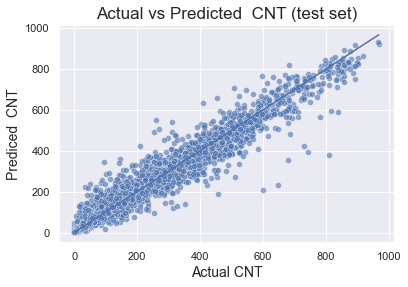

In [13]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual CNT', fontsize=14)
plt.ylabel('Prediced  CNT', fontsize=14)
plt.title('Actual vs Predicted  CNT (test set)', fontsize=17)
plt.show()

Visually, this model is not looking so great. Ideally the predicitons would be much closer to the actual.

In [14]:
np.round(RF_regression.score(X_test, y_test),4)

0.9488

In [15]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

41.82

In [16]:
my_param_grid = {'n_estimators':[100,200], 'max_features':['log2', 'auto'], 'max_depth':[10,None]} 

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [19]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   1.0s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.8s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.9s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   0.9s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=100, total=   1.0s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=200, total=   1.9s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=200, total=   1.8s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  max_depth=10, max_features=log2, n_estimators=200, total=   1.8s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1000),
             param_grid={'max_depth': [10, None],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [100, 200]},
             verbose=2)

In [20]:
grid.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}

In [21]:
grid.best_estimator_

RandomForestRegressor(n_estimators=200, random_state=1000)

In [22]:
y_hat_optimized = grid.predict(X_test)

In [23]:
df_predictions['y_hat_optimized'] = y_hat_optimized
df_predictions.head()

,y_test,y_hat,y_hat_optimized
4495,26,21.38,21.100
4418,47,64.21,64.585
7141,11,4.91,4.905
14765,205,199.84,200.480
16541,65,80.55,76.010


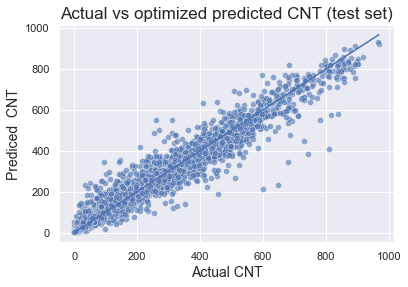

In [24]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual CNT', fontsize=14)
plt.ylabel('Prediced  CNT', fontsize=14)
plt.title('Actual vs optimized predicted CNT (test set)', fontsize=17)
plt.show()

In [25]:
np.round(grid.score(X_test, y_test),4)

0.9487

In [26]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
RMSE_test_opt

41.85

Visually, this model doesn't seem to be doing much better.The R^2 is a tiny bit higher (.01) but the RMSE is surprisingly slightly larger than before. RF is using a very bushy tree - above in the grid.best_params_ output the 'max_depth' is set to none.

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
R2 = cross_val_score(estimator = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [29]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.8966

In [30]:
np.random.choice (100,size=100)

array([65, 85,  3, 44, 74,  0, 12, 30, 69, 56, 96, 86,  9, 74, 64, 12, 25,
       64, 63, 74, 84, 62, 34, 56, 93, 55, 55, 53, 24, 83,  0, 69, 34, 46,
       25, 68, 61, 72,  7, 49, 80, 78, 52, 26, 60, 13, 26, 94, 85,  8, 67,
       60, 80, 13, 85, 83, 17, 87, 83, 11, 60, 61, 31, 36, 30, 67, 30, 17,
       22, 48, 16, 63, 31, 72, 52, 55, 93, 51, 48, 52, 47,  6,  4, 27, 94,
        0,  9, 62, 83, 22, 51, 58, 57, 80, 87, 22, 39, 93, 21, 19])

In [31]:
np.unique(np.random.choice (100,size=100)).size

61

In [32]:
RF_oob = RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      oob_score=True)

In [33]:
RF_oob.oob_score_

0.9053502835662313

OOB is doing slightly better than cross validation here - the estimated R^2 in the test set using OOB is slightly better than the R^2 estimate using CV.

In [34]:
features = list(X_train.columns)
features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'notbizday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [35]:
RF_Regressor = RandomForestRegressor(n_estimators = 500, max_features='sqrt', max_depth=20, random_state= rand_state)
RF_Regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500,
                      random_state=1000)

In [36]:
importance = RF_Regressor.feature_importances_
importance

array([0.04019892, 0.07052285, 0.0437904 , 0.47789922, 0.00290958,
       0.03678655, 0.03079878, 0.0205904 , 0.13488911, 0.10172075,
       0.03989344])

In [37]:
FIM = pd.DataFrame({'Features': X_train.columns , 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
4,holiday,0.002910
7,weathersit,0.020590
6,notbizday,0.030799
5,weekday,0.036787
10,windspeed,0.039893
0,season,0.040199
2,mnth,0.043790
1,yr,0.070523
9,hum,0.101721
8,temp,0.134889


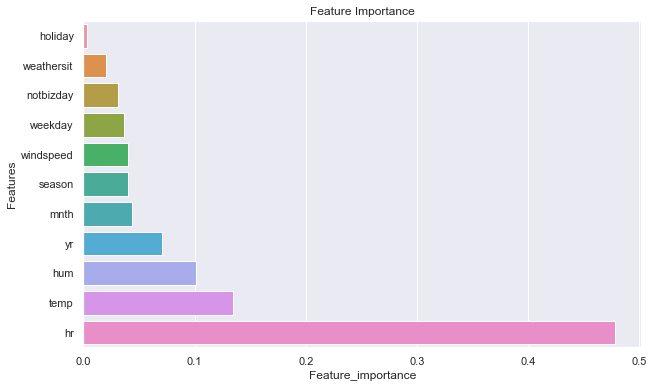

In [38]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

In [39]:
import statsmodels.api as sm

In [40]:
# With statsmodels, we need to mannually add a constant to our dataset!
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [41]:
# Fit the model
model = sm.OLS(y_train,X_train_wc)
statsmodels_reg= model.fit()

In [42]:
statsmodels_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     691.2
Date:                Sun, 11 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:21:49   Log-Likelihood:                -77471.
No. Observations:               12165   AIC:                         1.550e+05
Df Residuals:                   12153   BIC:                         1.551e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.5033      5.664      2.737      0.006       4.401      26.606
season        19.3442      2.114      9.149      0.000      15.199      23.489
yr            80.3554      2.576     31.191      0.000      75.306      85.405
mnth           0.0406      0.658      0.062      0.951      -1.249       1.330
hr             7.4540      0.196     38.014      0.000       7.070       7.838
holiday      -23.9886      7.879     -3.045      0.002     -39.432      -8.545
weekday        1.7031      0.643      2.649      0.008       0.443       2.964
notbizday     -2.4919      2.857     -0.872      0.383      -8.093       3.109
weathersit    -3.5995      2.274     -1.583      0.113      -8.057       0.858
temp          54.3312      1.378     39.424      0.000      51.630      57.033
hum          -37.7405      1.578    -23.919      0.000     -40.833     -34.648
windspeed      4.7366      1.362      3.477      0.001       2.066       7.407
==============================================================================
Omnibus:                     2452.232   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4830.463
Skew:                           1.219   Prob(JB):                         0.00
Kurtosis:                       4.893   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The 5 most important features: Hour, Temperature, Humidity, Year, Month

The 5 most significant variables: Temperature, Hour, Year, Season, Windspeed

Humidity is important in the RF analysis but not significant in the regression. There must be a nonlinear pattern in humidity - RF can capture it but a linear regression model cannot.

In [43]:
df.loc[:, 'overload'] = np.where(df.cnt>500, 1, 0)

In [44]:
pd.crosstab(df['overload'],df['overload'], normalize='all')*100

overload,0,1
overload,,
0,92.640543,0.000000
1,0.000000,7.359457


The ratio of overload to nonoverload is relatively imbalanced.

In [45]:
y = df['overload']
X = df.drop(['overload', 'cnt'], axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Fitting RF classifier to the Training set

RF_classifier = RandomForestClassifier(random_state=rand_state)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

In [48]:
# Predicting the Test set probabilities and classes
y_hat = RF_classifier.predict(X_test)
y_hat_probs = RF_classifier.predict_proba(X_test)[:,1] 
# predicted probabilities are reported for both classes. we saved the prob of purchased!

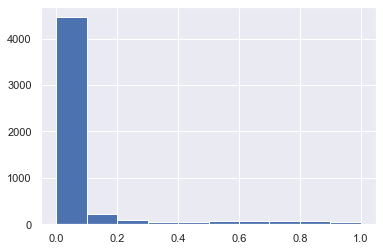

In [49]:
plt.hist(y_hat_probs)
plt.show()

A vast majority of the predictions are a probability of 0, which makes sense because we have a relatively imbalanced target variable. It looks like this model is always predicting that overload = 0 at a thresold around .1. Raising this threshold may balance this out a little bit.

In [53]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

#### Confusion matrix

In [54]:
print(confusion_matrix(y_test, y_hat))

[[4784   35]
 [ 113  282]]


#### Built-in classification report

In [55]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4819
           1       0.89      0.71      0.79       395

    accuracy                           0.97      5214
   macro avg       0.93      0.85      0.89      5214
weighted avg       0.97      0.97      0.97      5214



Accuracy is great at 97%, but our F1 score is not so good at only 79%. Our positive predictions aren't super accurate with a precision of 71%. Recall at 71% tells us that we're not capturing true postives as well as we'd like. We do not necessarily trust these statistics since our target variable is relatively imbalanced.

In [56]:
my_param_grid = {'n_estimators':[100,200], 'criterion':['gini','entropy'],  'max_features':['log2', 'auto'], 'max_depth':[10,None]}

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=rand_state),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [59]:
# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] criterion=gini, max_depth=10, max_features=log2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=10, max_features=log2, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=10, max_features=log2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, max_features=log2, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=10, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=log2, n_estimators=100, total=   0.9s
[CV] criterion=gini, max_depth=10, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=log2, n_estimators=100, total=   0.8s
[CV] criterion=gini, max_depth=10, max_features=log2, n_estimators=100 
[CV]  criterion=gini, max_depth=10, max_features=log2, n_estimators=100, total=   1.0s
[CV] criterion=gini, max_depth=10, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=10, max_features=log2, n_estimators=200, total=   1.7s
[CV] criterion=gini, max_depth=10, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=10, max_features=log2, n_estimators=200, total=   1.4s
[CV] criterion=gini, max_depth=10, max_features=log2, n_estimators=200 
[CV]  criterion=gini, max_depth=10, max_featur

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1000),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, None],
                         'max_features': ['log2', 'auto'],
                         'n_estimators': [100, 200]},
             verbose=2)

In [60]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

In [65]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2',
                       random_state=1000)

In [66]:
y_hat_optimized = grid.predict(X_test)

#### Confusion matrix

In [67]:
print(confusion_matrix(y_test, y_hat_optimized))

[[4782   37]
 [ 100  295]]


#### Built-in classification report

In [68]:
print(classification_report(y_test, y_hat_optimized))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4819
           1       0.89      0.75      0.81       395

    accuracy                           0.97      5214
   macro avg       0.93      0.87      0.90      5214
weighted avg       0.97      0.97      0.97      5214



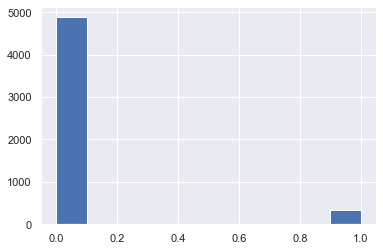

In [69]:
plt.hist(y_hat_optimized)
plt.show()

It looks like we are doing better now - accuracy is the same at 97%, but our F1 score is slightly better at 81%. Our positive predictions are much better with a precision of 89% and our recall has also improved to 75% so we're capturing true postives better. 

Best_params_ shows max_depth = none so our improved RF model is using a very bushy tree.

In [70]:
R2 = cross_val_score(estimator = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=500), X = X_train, y = y_train, cv = 5 , scoring="r2" )

In [71]:
R2_CV = round(np.mean(R2),4)
R2_CV

0.5987

In [72]:
np.random.choice (100,size=100)

array([75, 80,  1, 15, 95, 16, 74, 38, 26, 98, 50, 30, 20, 74, 25, 72, 65,
       42, 42, 63, 24, 29, 60,  7, 11, 50, 63, 67, 11, 92, 40, 31, 69, 52,
       94,  6, 40, 95, 44, 89, 84, 91, 74, 14, 43, 63, 79, 70,  3, 92,  1,
       28, 36, 84, 34, 78, 44, 48, 38, 44,  4, 20, 37, 91, 57, 87, 71, 55,
       98, 76,  7, 89, 73, 92, 63, 31, 55, 98, 45, 28, 42,  9, 83, 82, 16,
       80, 28, 74, 36, 15, 39, 64, 67,  0, 36, 91,  7, 80,  9, 61])

In [73]:
np.unique(np.random.choice (100,size=100)).size

69

In [74]:
RF_oob = RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=500, oob_score=True)
RF_oob.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=500,
                       oob_score=True)

In [75]:
RF_oob.oob_score_

0.9738594327990135

OOB is giving us a higher estimate of the R^2 in the test set compared to CV, but both the OOB and CV results are lower than we'd like.

In [81]:
RF_balanced = RandomForestClassifier(random_state=rand_state, criterion='entropy', max_features='log2', max_depth=None, class_weight='balanced_subsample')

In [82]:
y_hat_balanced = RF_balanced.fit(X_train, y_train).predict(X_test)

In [83]:
print(confusion_matrix(y_test, y_hat_balanced))

[[4788   31]
 [ 103  292]]


In [84]:
print(classification_report(y_test, y_hat_balanced))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4819
           1       0.90      0.74      0.81       395

    accuracy                           0.97      5214
   macro avg       0.94      0.87      0.90      5214
weighted avg       0.97      0.97      0.97      5214



Accuracy is still great at 97%, and our F1 has also not changed (still at 81%). Our positive predictions are doing slightly better - precision is now at 90%. Recall, however, decreased slightly to 74%. This doesn't make sense though - when we used the balanced version of RF, the threshold at which we predict overload = 0 has been lowered, so the model is should be predicting more overload = 1 than before. Theoretically this allows us to capture true positives better, but we take on more false positives. In this case, the recall decreased though - we are not sure what happened.

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score

No Skill     : ROC AUC=0.500
Random Forest: ROC AUC=0.985


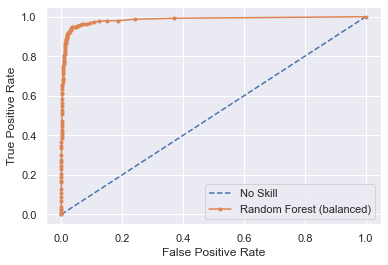

In [86]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0 for i in range(len(y_test))]
lr_probs = RF_balanced.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill     : ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest (balanced)')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

This ROC curve is looking great, and we can't be unhappy with an AUC of .985. Our model is definitely doing better than no skill. We do trust this number because we're using the balanced RF.

In [87]:
features = list(X_train.columns)
features

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'notbizday',
 'weathersit',
 'temp',
 'hum',
 'windspeed']

In [88]:
importance = RF_balanced.feature_importances_
importance

array([0.03241689, 0.12167405, 0.05412284, 0.41955584, 0.0048067 ,
       0.04424252, 0.04410568, 0.01615674, 0.12550181, 0.09232921,
       0.04508771])

In [89]:
FIM = pd.DataFrame({'Features': X_train.columns , 'Feature_importance':importance})
FIM = FIM.sort_values(by=['Feature_importance'])
FIM

,Features,Feature_importance
4,holiday,0.004807
7,weathersit,0.016157
0,season,0.032417
6,notbizday,0.044106
5,weekday,0.044243
10,windspeed,0.045088
2,mnth,0.054123
9,hum,0.092329
1,yr,0.121674
8,temp,0.125502


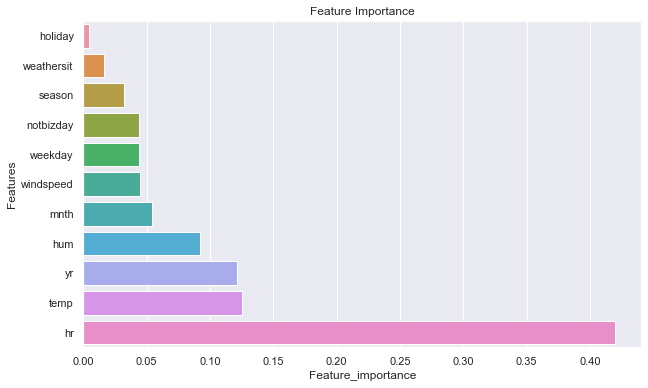

In [90]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='Features', x='Feature_importance', data=FIM)
plt.show()

Top 5 features: Hour, Temperature, Year, Humidity, and Month

These are absolutely consistent with common sense. The number of bikes rented is likely to be higher when the weather is comfortable (temps and humidity not too high or too low) and when the time is right (peak tourist season, times when people are not at work).